In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [2]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/MAXI J1810-222.txt")

MAXI J1810-222
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  68
Added 10.0% systematic uncertainty to the X-ray data.


In [3]:
obs_df

,name,xray_CI,xray_obs_ref,radio_obs_ref,extra_xray_text,extra_radio_text
0,MAXI J1810-222,68,[Savard et al. (in prep.) & ],[Savard et al. (in prep.) & ],NaN,NaN


In [4]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,MAXI J1810-222,1682819781,L,60064.11443,0.010459,NaN,HS,0.33,0.019294,NaN,NaN,NaN,False
1,MAXI J1810-222,1683339854,L,60070.16022,0.010366,NaN,HS,0.20,0.022361,21.05,NaN,NaN,False
2,MAXI J1810-222,1684103257,L,60078.96848,0.010366,NaN,HS,0.24,0.023324,20.39,NaN,NaN,False
3,MAXI J1810-222,1684711875,L,60086.06257,0.010366,NaN,HS,0.11,0.020742,21.68,NaN,NaN,False
4,MAXI J1810-222,1685152874,L,60091.11790,0.010366,NaN,HS,0.10,0.011180,12.84,NaN,NaN,False


In [5]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,MAXI J1810-222,11105091,60044.06959,0.018449,peak/trough,HS,1.645300e-10,1.694249e-11,1.695184e-11,tbabs*cflux*powerlaw,chi,False
1,MAXI J1810-222,11105093,60066.85242,0.073544,peak/trough,HS,1.995900e-10,2.046842e-11,2.049136e-11,tbabs*cflux*powerlaw,chi,False
2,MAXI J1810-222,11105094,60071.19389,0.008729,peak/trough,HS,1.736800e-10,1.831250e-11,1.834467e-11,tbabs*cflux*powerlaw,chi,False
3,MAXI J1810-222,11105095,60078.80149,0.010123,peak/trough,HS,1.547300e-10,1.571897e-11,1.670421e-11,tbabs*cflux*powerlaw,chi,False


# Light Curves

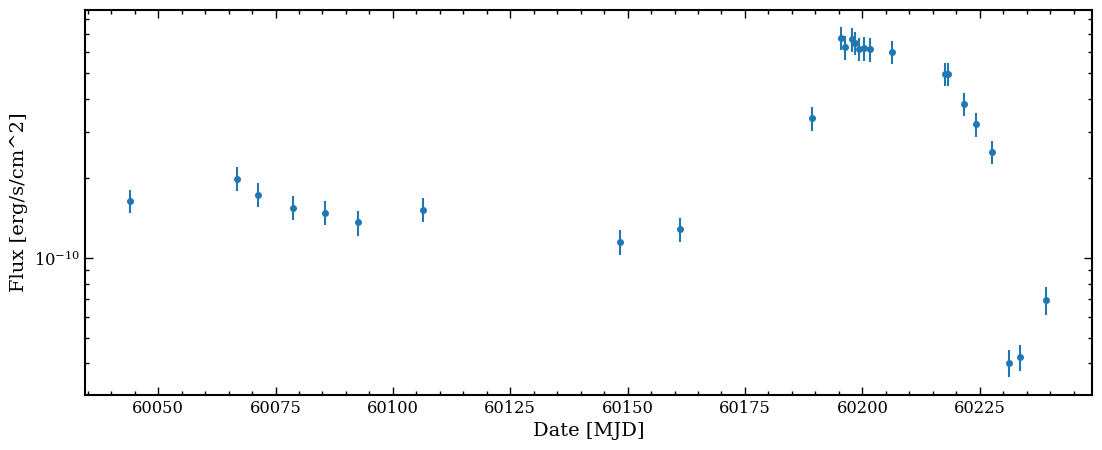

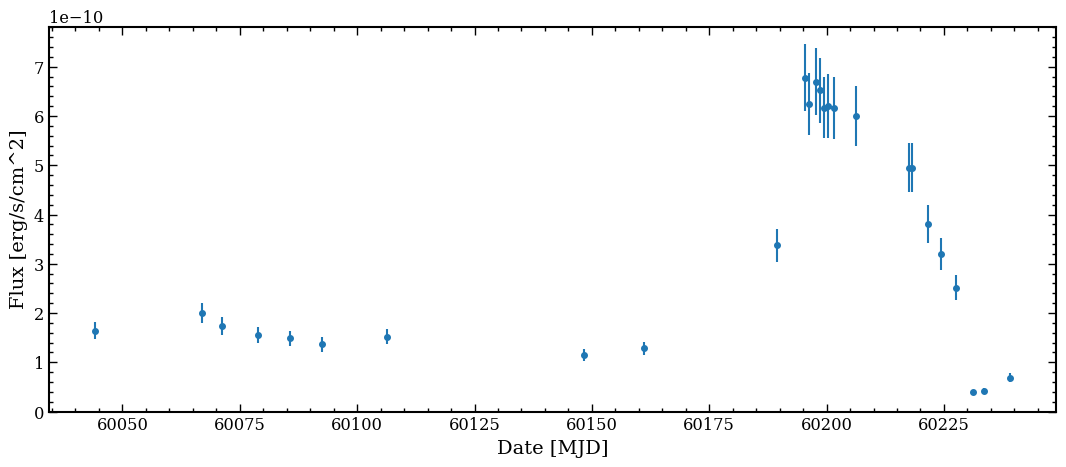

In [6]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

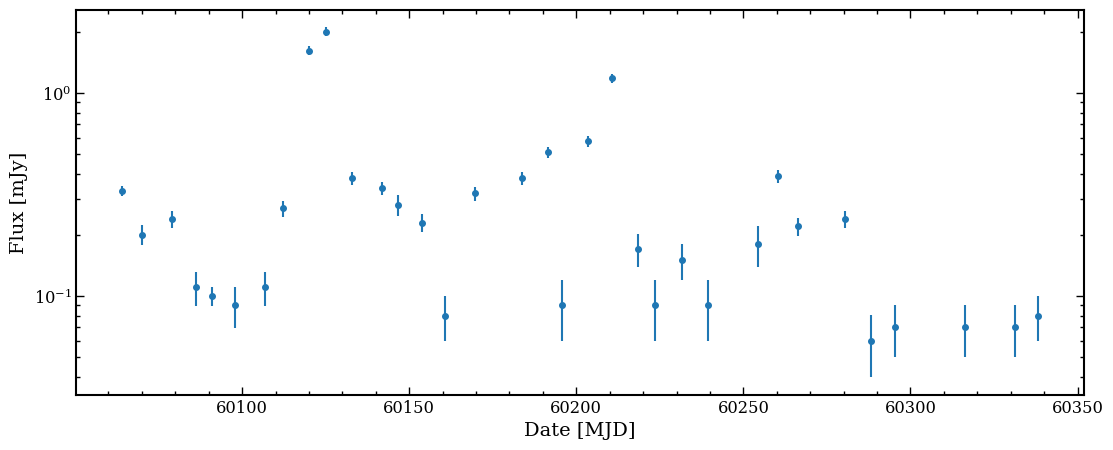

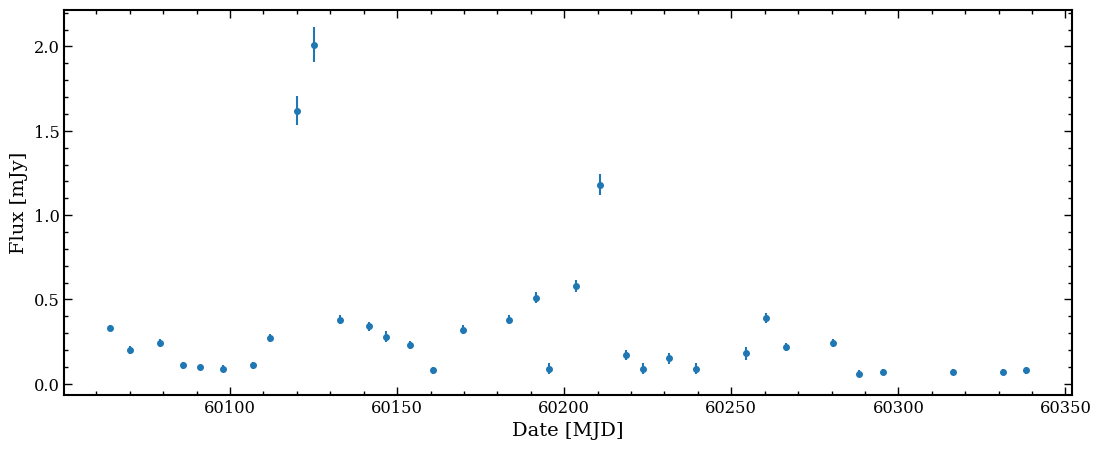

In [7]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing

In [8]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
60078.968480000     0.24000             0.02332             1         1.54730e-10                   1.57190e-11                   1.67042e-11                   False          False          HS             
60086.062570000     0.11000             0.02074             1         1.48610e-10                   1.57369e-11                   1.57538e-11                   False          False          HS             
60106.965260000     0.11000             0.02074             1         1.52280e-10                   1.59707e-11                   1.62775e-11                   False          False          HS             
60160.819920000     0.08000             0.02040             1         1.28350e-10                   1.37048e-11                   1.37223e-11                   False          F

In [9]:
lr_all, lx_all, all_types = get_bahramian_data()

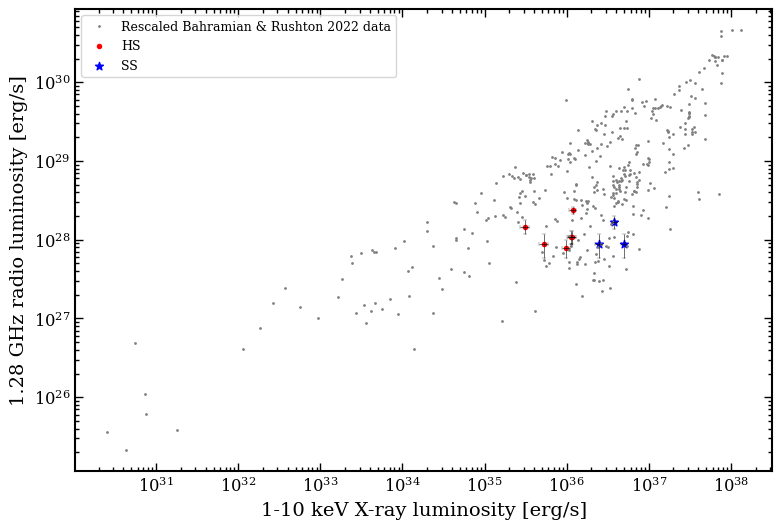

In [10]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

# Interpolation

dt1, dt2:  3.0 10.0

Number of plotting points:  390
Rejected based on distance: radio_MJD = 60064.11443; time_to_nearest: 2.737990000001446; time_to_furthest: 20.044840000002296
60070.16022: time_to_nearest: 1.0336700000043493 & time_to_furthest: 3.3077999999950407; y_predict_err: 0.04298975202832267
60078.96848: time_to_nearest: 0.16699000000517117 & time_to_furthest: 6.629079999998794; y_predict_err: 0.04633458115766054
60086.06257: time_to_nearest: 0.4650099999998929 & time_to_furthest: 6.544379999999364; y_predict_err: 0.0473482036136712
60091.1179: time_to_nearest: 1.4890500000037719 & time_to_furthest: 5.520339999995485; y_predict_err: 0.04381357444188794
Rejected based on distance: radio_MJD = 60097.95288; time_to_nearest: 5.34592999999586; time_to_furthest: 8.483200000002398
60106.96526: time_to_nearest: 0.5291799999977229 & time_to_furthest: 41.45415000000503; y_predict_err: 0.04891858162510232
Rejected based on distance: radio_MJD = 60112.10599; time_to_nearest: 5.6699099999

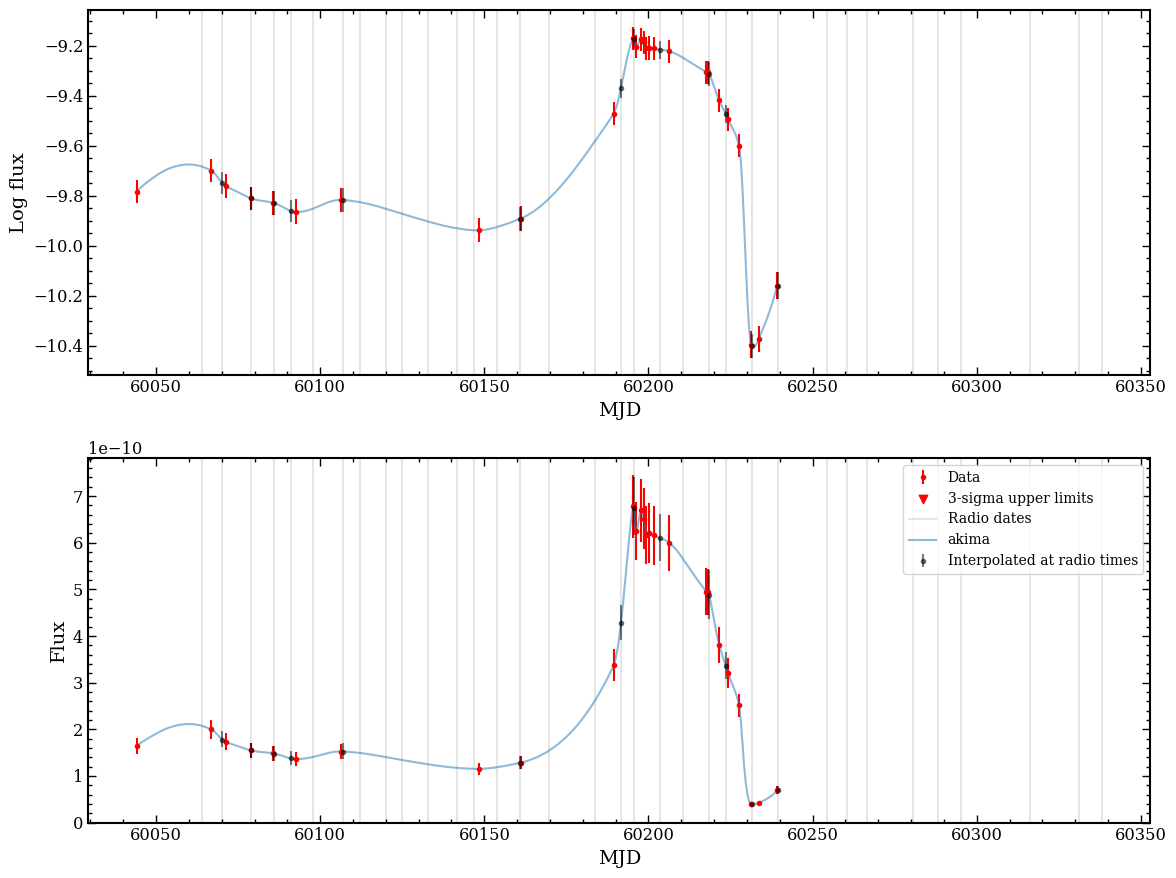

Number of used interpolated data points:  13
Converting to luminosity using d_kpc = 8.0


In [11]:
interpolated_data = make_interpolated_Lr_Lx_df(radio_df, xray_df, source_df, plotly=True)

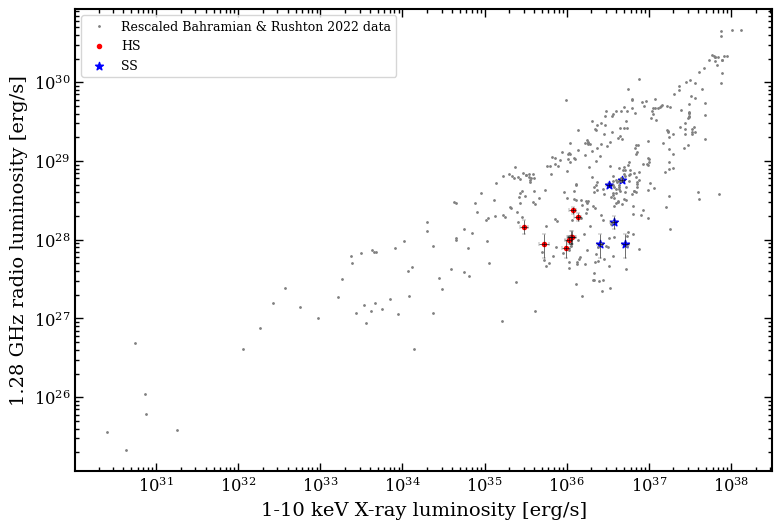

In [12]:
plot_Lr_Lx(interpolated_data, colourby="state", lx=lx_all, lr=lr_all)